# CTFT->DTFT->DFT->FFT

 - [1] https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html
 - [2] http://eceweb1.rutgers.edu/~gajic/solmanual/slides/chapter9_DFT.pdf
 - [3] http://www.johnkerl.org/doc/fourpoi-slides.pdf
 - [4] https://web.iit.edu/sites/web/files/departments/academic-affairs/academic-resource-center/pdfs/nyquistSamplingTheorem1.pdf
 - [5] https://engineering.purdue.edu/~bouman/ece637/notes/pdf/CTFT.pdf
 - [6] https://mathworld.wolfram.com/FourierSeries.html
 - [7] https://engineering.purdue.edu/~bouman/ece637/notes/pdf/DTrans.pdf

### Dirac Delta function

The Fourier series of Delta function can be derived as:
$$
\delta(t) = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} e^{jkt} = 1 + 2 \sum_{k=1}^{\infty} cos 2\pi kx
$$

Although it's not a converge sequence, which is expected since delta function itself is un-limited in magnitude, but we can see that in the limit sense (from the code below) that the equation is truly correct.

Since Fourier series represent periodic function, so it's actually impulse train rather than a single delta function:
$$
\sum_k \delta(t-k) = \sum_k e^{j2\pi kt}
$$

More generally:
$$
\sum_k \delta(t-kT) = \frac{1}{T} \sum_k \delta(t/T-k) = \frac{1}{T} \sum_k e^{j2\pi kt/T}
$$
and its CTFT is also a impulse train:
$$
\begin{align*}
\sum_k \delta(t-kT) \xtofrom{CTFT} \int \sum_k \delta(t-kT) e^{-j\omega t} dt = \sum_k e^{-j\omega kT} &= \frac{2\pi}{T} \sum_k \delta(\omega-k\frac{2\pi}{T}) \\
&= \frac{1}{T} \sum_k \delta(f-k\frac{1}{T})

\end{align*}
$$

- https://www.sciencedirect.com/topics/mathematics/poisson-summation-formula
- https://www.sciencedirect.com/topics/mathematics/delta-function

Text(0.5, 0, 'pi')

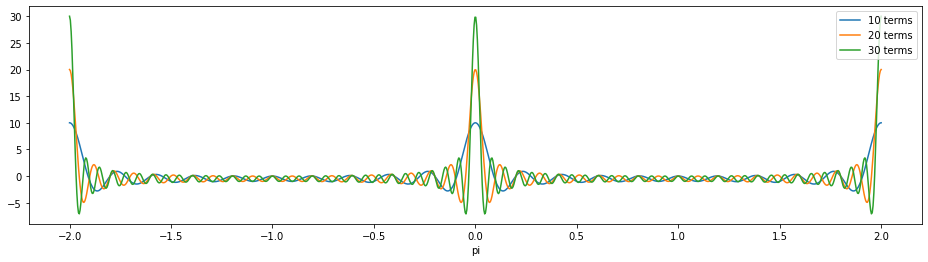

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
t=np.linspace(-2, 2, 1000); x = t*0
for m in range(1, 1000+1):
    x += np.cos(m*t*np.pi)
    if m in (10,20,30): plt.plot(t, x.copy(), label="{} terms".format(m))
plt.legend(); plt.xlabel("pi")


Possion summation formula can be derived from that:

$$
\begin{align*}
\sum_k x(k) &= \sum_k \int x(t) \delta(t-k) dt = \int x(t) \sum_k \delta(t-k) dt \\
            &= \int x(t) \sum_k e^{j2\pi kt} dt = \sum_k \int x(t) e^{-j2\pi kt} dt \\
            &= \sum_k X(jk)
\end{align*}
$$

### Sampling process
The sampling process (w/o the need of DTFT) in CT domain can be modeled with impulse train multiplication.(although not accurate since the result signal would have infinite magnitude at discrete time steps, but that's neccessary to get a meaningful spectrum)

$$
   x_s(t) = x(t) \sum_n \delta (t-nT_s) \xtofrom{CTFT} \frac{1}{T_s} \sum_n X(f - nf_s)
$$

so we can see easily how the alias would happen.
 - https://image.slideserve.com/464902/sampling-theorem-multiplication-in-image-domain-is-convolution-in-spectral-l.jpg

### DTFT
In general `CTFT` $X(j\omega)$ can be approximated using [Riemann sum](https://brilliant.org/wiki/riemann-sums/), but for sampled signal which's CTFT is periodic function, and the computation can be done exactly using sum instead of integral. 

$$
\begin{align*}
X(j\omega) &= \int_{-\infty}^{\infty} x(t) \sum_k \delta (t-kT_s) e^{-j\omega t} dt \\
           &= \sum_{k=-\infty}^{\infty} x(kT_s)e^{-j\omega kT_s} \\
           &\xlongequal{x_k=x(kT_s) \ \ \Omega = \omega T_s } \sum_{k=-\infty}^{\infty} x_k e^{-jk\Omega} \\
           &= X(\Omega)
\end{align*}
$$

So `DTFT` is exactly CTFT for sampled signal, due to the discrete sampling, it becomes periodical with period $2\pi$, and $\omega$ with period $2\pi/T_s = 2\pi f_s$.

But note here the time domain signal is `modulated impulse train` simulating the real discrete signal, so the inverse CTFT integral is not converge (periodic spectrum integral doesn't converge), a proper inverse DTFT is developed by noticing that the spectrum is $2\pi$ periodic and othogonal property of the exponential sinusoid functions:
$$
x_k = \frac{1}{2\pi} \int_{-\pi}^{\pi} X(\Omega) e^{jk\Omega} d\Omega
$$

### DFT (FFT) from Fourier series

Fouries series is discretized spectrum analyze method, it decomposes periodic signal into linear combination of harmonic components ($\omega_0$ is the fundamental frequency of periodic signal x(t)):

$$
 x(t) = \sum_{k=-\infty}^{\infty} c_k e^{jk\omega_0 t}
$$

the harmonic components defined by $e^{jk\omega_0 t}$ is othogonal basis(not exactly) in term of dot-product defined as integral of product over one fundamental period T:
$$
\begin{align*}
  <e^{jm\omega_0 t}, e^{jn\omega_0 t}> = \int_{t=0}^{T} e^{jm\omega_0 t} e^{jn\omega_0 t} dt &= \int_{t=0}^{T} e^{j(m+n)\omega_0 t} dt \\
&=
\begin{cases}
   T &\text{if } m+n=0 \\
   0 &\text{otherwise }
\end{cases}

\end{align*}
$$

Thus the Fourier series coefficients $c_k$ can be recovered by dot product x(t) with othogonal base vector:

$$
c_k = \frac{1}{T} <x(t), e^{-jk\omega_0 t}> = \frac{1}{T} \int_{t=0}^{T} x(t) e^{-jk\omega_0 t} dt
$$

more realistic method is in trigonometric form as shown in ref [6]

For discrete sampled signal x[k] with period N and sample interval T0, Discrete Fourier Series can be built based on same principle, but this time:
 - the othogonal basis is also discrete in time.
 - the discretized basis has finite numbers because it's frequency resolution is limited by discrete sampling.

$$
 x_n = x(nT_s) = \sum_{k=-\infty}^{\infty} c_k e^{jk\omega_0 nT_s} = \sum_{k=-\infty}^{\infty} c_k e^{jk2\pi nT_s/T_0} = \sum_{k=-\infty}^{\infty} c_k e^{jk2\pi n/N}
$$

Notice that $e^{jk\omega_0 n/N} = e^{j(k+N)\omega_0 n/N}$, so unlike CFS, there is no need for infinite number of basis, N bases are enough, and again Ck can be recovered by dot-product with othogonal bases:

$$
 x_n = \sum_{k=0}^{N-1} c_k e^{jk2\pi n/N} \\
 c_k = \frac{1}{N} \sum_{n=0}^{N-1} x_n e^{-jk2\pi n/N}
$$

Most DFT(FFT) put the factor 1/N in inverse transform by convention(maybe for saving computation for forward transform), but that's not a big deal, the core idea is always:

 **harmonic components decomposition of periodic signal**

FFT is just a Fast implementation of DFT.

### DFT from Fourier transform

Thanks to delta function, Fourier transform can also represent periodic signal, consider inverse CTFT on a delta function spectrum:

$$
f(t) = \int_{-\infty}^{\infty} \delta(f-f_0) e^{j2\pi ft} df = e^{j2\pi f_0t}
$$

which suggest a periodic signal base $e^{j2\pi f_0t}$ has CTFT of a delta function, although forward CTFT shows no convergent result: 

$$
\int_{-\infty}^{\infty} e^{j2\pi f_0t} e^{-j2\pi ft} dt = \int_{-\infty}^{\infty} e^{j2\pi (f_0 - f)t} dt
$$

but we can still define CTFT of exponential sinusoid signal as delta function:

$$
 e^{j2\pi f_0t} \xtofrom{CTFT} \delta(f-f_0)
$$

Notice above CTFT pair is exactly the base of Fourier series, so by decomposed any periodic signal as Fourier Series and then do CTFT we know its spectrum is magnitude modulated impulse train (linear combination of delta functions).

$$
x(t)=\sum_{k=-\infty}^{\infty} c_k e^{jk\omega_0 t} \xtofrom{CTFT} \sum_{k=-\infty}^{\infty} c_k \delta(f-f_k)
$$

and the equation above also shows that you cannot get CTFT of a periodic signal w/o first get its Fourier series coefficients, so CTFT of periodic signal is more like a theroy tool that unified both periodic and non-peridoc signal into same CTFT spectrum representation.

In similar way, periodic discrete signal also have DTFT defined by delta function (since the frequency domains for both CTFT and DTFT are all continous):
$$
 x_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k e^{jk2\pi n/N} \xtofrom{DTFT} \frac{2\pi}{N} \sum_{k=0}^{N-1} c_k \delta(\Omega-2\pi k/N)
$$


## Simple notation
let $e_{kn}$ denotes $e^{-j2\pi\frac{kn}{N}}$ which is function of k*n with period N, $ e_{-kn} = e_{k(N-n)} = e_{(N-k)n} $ we have:
 
$$
 X[n] = \sum_{k=0}^{N-1} x_k e_{kn} \\
 x_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n e_{-kn}
$$

Since from above definition both $x_k$ and X[n] are sum of $e_{-kn}$, so we know they are all periodic signal with period N:

$$
X[n] = X[n+N] = X[n+2N] ... \\
x_k = x_{k+N} = x_{k+2N} ...
$$

When we do FFT on a signal, we are actually take a windowed segment of it and repeat that segment periodically.

## FFT of Time reversed signal is conjugate of FFT of orginal signal

$$
 X^*[n] \xtofrom{FFT} x_{-n}
$$

prove:

$$
\begin{align*}
X[n] &= \sum_k x_k e_{kn} \\
X^*[n] &= \sum_k x_k e_{-kn} = \sum_k x_k e_{(N-k)n} \\
       &\xlongequal{k'=N-k} \sum_{k'} x_{N-k'} e_{k'n} \\
       &\xtofrom{FFT} x_{N-n} = x_{-n}\\
\end{align*}
$$



## multiplication of two FFTs

$$
\begin{align*}
X[n] Y[n] &= \sum_k x_k e_{kn} \sum_p y_p e_{pn} \\
          &= \sum_k\sum_p x_k y_p e_{(k+p)n}  \\
          &= \sum_m (\sum_{k+p=m} x_k y_p) e_{mn} \\
          &\xtofrom{FFT} ( z_m = \sum_{k+p=m} x_k y_p)
\end{align*}
$$

The signal $z_m = \sum_{k+p=m} x_k y_p$ is actually convolution between signal x and y. and since x and y are all periodic functions, this is actually a `circular convolution`.

## Padding zero to x[k] = Spectrum oversampling

The longer the period of input signal, the higher the spectrum resolution since the fundamental frequency becomes lower.

scipy's fft function accept parameter n to do auto-padding internally to increase period of input signal. With that padding we have higher spectrum resolution (N is the number of samples taken from $[0,2\pi)$ period).

Inversely:
 - interpolated FFT spectrum with higher resolution would reconstruct longer x[k] with padding zeros when passed into IFFT.
 - interpolated FFT spectrum with lower resolution would reconstruct shorter x[k] when passed into IFFT.


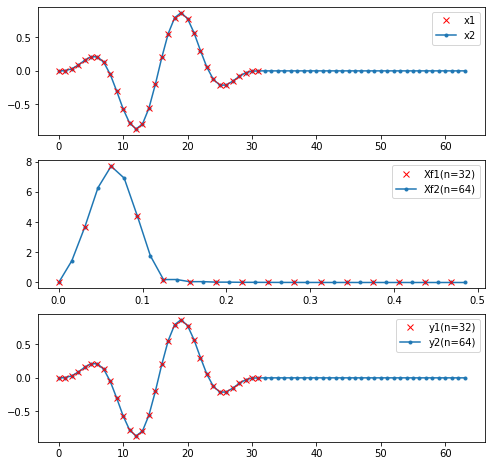

In [21]:
from scipy.fft import fft, ifft, fftfreq
from scipy import signal
import numpy as np
import IPython
import matplotlib.pyplot as plt
from vscode_audio import Audio
from lpc_helper import *
%matplotlib inline

Fs = 32
Ts = 1/Fs
def generate(t0, t1, N):
    # 1 second signal sampled at Fs sample rate
    t = np.linspace(t0, t1, Fs)
    x = np.sin(t*4*np.pi) 
    x = np.sin(t*4*np.pi) * scipy.signal.windows.hann(len(t))
    #x = scipy.signal.windows.hann(len(t))
    x = np.append(x, np.zeros(N-len(x)))
    Xf = fft(x)
    f = fftfreq(len(Xf))[:len(Xf)//2]
    return (t,x,f,Xf)

t1,x1,f1,Xf1 = generate(0,1,32)
t2,x2,f2,Xf2 = generate(0,1,64)

plt.figure(figsize=[8,8])
plt.subplot(311)
plt.plot(x1, "xr", label="x1")
plt.plot(x2, ".-", label="x2", zorder=1)
plt.legend()

plt.subplot(312)
plt.plot(f1, np.abs(Xf1)[:len(f1)], "xr", label="Xf1(n=32)")
plt.plot(f2, np.abs(Xf2)[:len(f2)], ".-", label="Xf2(n=64)", zorder=1)
plt.legend()


plt.subplot(313)
y1 = ifft(Xf1)
y2 = ifft(Xf2)
plt.plot(y1.real, "xr", label="y1(n=32)")
plt.plot(y2.real, ".-", label="y2(n=64)", zorder=1)
plt.legend()

## Spectrum stretching = Signal Sample-rate & Length change = Discrete signal stretching in time

Let's see what will happen if we change sample rate from T1 to T2:

$$
\begin{align*}
X(j\omega) &= \int_{-\infty}^{\infty} x(t)e^{-j\omega t} dt \\
           &= \lim_{T_1 \to 0} T_1\sum_{k=-\infty}^{\infty} x(kT_1)e^{-j\omega kT_1} \\
           &= \lim_{T_2 \to 0} T_2\sum_{k=-\infty}^{\infty} x(kT_2)e^{-j\omega kT_2}
\end{align*}
$$

If both T1 & T2 is small, we have:
$$
\begin{align*}
T_1\sum_{k=-\infty}^{\infty} x(kT_1)e^{-j\omega kT_1} \approx T_2\sum_{k=-\infty}^{\infty} x(kT_2)e^{-j\omega kT_2}
\end{align*}
$$

So DTFT/DFT/FFT on same signal sampled on 2 different sample-rate is proportional under following sense:

$$
 T_1 X_1(\Omega) \approx T_2 X_2(\beta \Omega ) \ \ \ \  \beta = \frac{T_2}{T_1}
$$

So the larger sample rate would produce spectrum wider stretched in frequency.

In [ ]:
# Spectrum manipulation
def spman_interp(Xf):
    N = len(Xf)//2
    idx = range(N+1)
    idx_new = np.arange(0, N+1)/2
    Xfn = interp1d(idx, Xf[idx], kind='linear')(idx_new)
    Xfn[-1] = np.abs(Xfn[-1])
    return np.append(Xfn, np.conjugate(Xfn[-1:0:-1]))

def spman_stretch(Xf, ratio = 0.5):
    N = len(Xf)//2
    if (ratio < 1):
        Xfn = Xf[:int(N*ratio)+1]
    else:
        Xfn = np.append(Xf[:N+1], np.zeros(int(N*(ratio-1))))
    Xfn[-1] = np.abs(Xfn[-1])
    return np.append(Xfn, np.conjugate(Xfn[-2:0:-1]))

Xforg = Xf1
fo = fftfreq(len(Xforg))[:len(Xforg)//2]

#Xf3 = spman_interp(Xf2)
Xfnew = spman_stretch(Xforg, 1.8)
fn = fftfreq(len(Xfnew))[:len(Xfnew)//2]

plt.figure(figsize=[8,6])

ax1 = plt.subplot(211)
plt.plot(fo, np.abs(Xforg)[:len(fo)], ".-", label="Xforg")
plt.plot(fn, np.abs(Xfnew)[:len(fn)], ".-", label="Xfnew(stretched)")
ax1.set_xlabel("freq(Hz)")
plt.legend()

ax2 = plt.subplot(212)
yorg = ifft(Xforg)
ynew = ifft(Xfnew)
plt.plot(yorg.real, ".-", label="yorg")
plt.plot(ynew.real, ".-", label="ynew")

plt.legend()